In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [291]:
df = pd.read_csv('tryout_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   participant_no    3252 non-null   int64 
 1   name              3252 non-null   object
 2   pu                3252 non-null   object
 3   ppu               3252 non-null   object
 4   kmbm              3252 non-null   object
 5   pk                3252 non-null   object
 6   lit_ind           3252 non-null   object
 7   lit_ing           3252 non-null   object
 8   pm                3252 non-null   object
 9   total             3252 non-null   object
 10  status_kelulusan  3252 non-null   object
 11  timestamp         3252 non-null   object
dtypes: int64(1), object(11)
memory usage: 305.0+ KB


In [292]:
df = df.drop(columns=['participant_no', 'name', 'status_kelulusan', 'timestamp'])

df.tail(5)

,pu,ppu,kmbm,pk,lit_ind,lit_ing,pm,total
3247,"22,87",X,X,X,X,X,X,"3,27"
3248,X,X,X,X,"12,39",X,"0,00","1,77"
3249,X,X,X,X,"12,39",X,X,"1,77"
3250,X,X,X,X,"12,39",X,X,"1,77"
3251,X,X,X,X,"12,39",X,X,"1,77"


In [293]:
# 1. Ganti 'X' dengan '0'
df = df.replace('X', 0)

# 2. Bersihkan data: hapus spasi & ganti koma dengan titik
df = df.applymap(lambda x: str(x).replace(' ', '').replace(',', '.'))

# 3. Konversi ke float per kolom (lebih aman)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\hp\AppData\Local\Temp\ipykernel_4300\3432355070.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(' ', '').replace(',', '.'))


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pu       3234 non-null   float64
 1   ppu      3250 non-null   float64
 2   kmbm     3252 non-null   float64
 3   pk       3252 non-null   float64
 4   lit_ind  3252 non-null   float64
 5   lit_ing  3252 non-null   float64
 6   pm       3252 non-null   float64
 7   total    3252 non-null   float64
dtypes: float64(8)
memory usage: 203.4 KB


In [295]:
df.isnull().sum()

pu         18
ppu         2
kmbm        0
pk          0
lit_ind     0
lit_ing     0
pm          0
total       0
dtype: int64

In [296]:
df = df.fillna(df.mean())

df = df.drop_duplicates()

In [297]:
df['Mean'] = df[['pu', 'ppu', 'kmbm', 'pk', 'lit_ind', 'lit_ing', 'pm']].mean(axis=1)
df['Sbaku'] = df[['pu', 'ppu', 'kmbm', 'pk', 'lit_ind', 'lit_ing', 'pm']].std(axis=1)
df['Min'] = df[['pu', 'ppu', 'kmbm', 'pk', 'lit_ind', 'lit_ing', 'pm']].min(axis=1)
df['Max'] = df[['pu', 'ppu', 'kmbm', 'pk', 'lit_ind', 'lit_ing', 'pm']].max(axis=1)

In [298]:
from sklearn.preprocessing import MinMaxScaler

P = df[['Mean', 'total']]

scaler = MinMaxScaler()
P = scaler.fit_transform(P) 

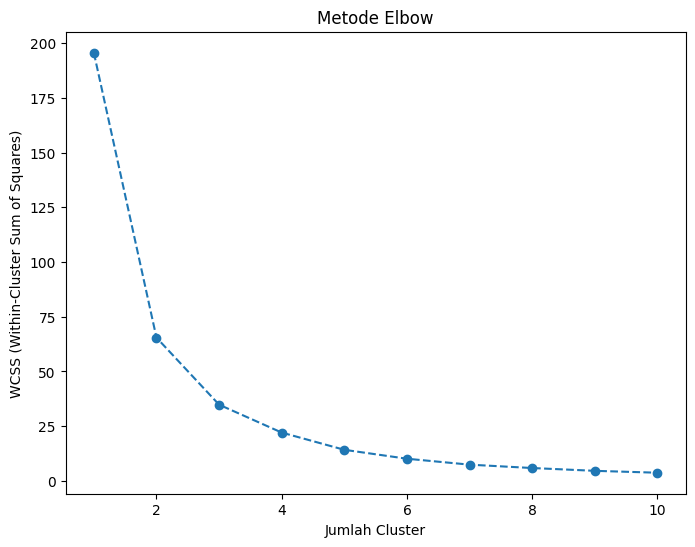

In [299]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(P)
    wcss.append(kmeans.inertia_)

# Visualisasi elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Metode Elbow")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [300]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster = kmeans.fit_predict(P)

In [301]:
#Type your code here

silhouette_avg = silhouette_score(P, cluster)
print(f"Silhouette Score yang didapat: {silhouette_avg:.3f}")

Silhouette Score yang didapat: 0.531


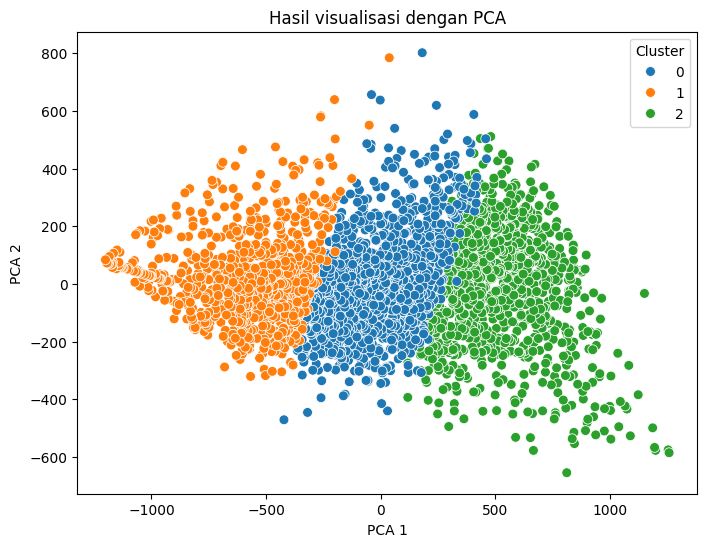

In [302]:
from sklearn.decomposition import PCA

df['Cluster'] = cluster

pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)

df_pca = pd.DataFrame(data_2d, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='tab10', s=50
)
plt.title("Hasil visualisasi dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3247 entries, 0 to 3248
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pu       3247 non-null   float64
 1   ppu      3247 non-null   float64
 2   kmbm     3247 non-null   float64
 3   pk       3247 non-null   float64
 4   lit_ind  3247 non-null   float64
 5   lit_ing  3247 non-null   float64
 6   pm       3247 non-null   float64
 7   total    3247 non-null   float64
 8   Mean     3247 non-null   float64
 9   Sbaku    3247 non-null   float64
 10  Min      3247 non-null   float64
 11  Max      3247 non-null   float64
 12  Cluster  3247 non-null   int32  
dtypes: float64(12), int32(1)
memory usage: 342.5 KB
